# Intro ML

First, connect to your own DSVM.

## Download Image Data from Blob Storage

In [1]:
!wget https://storageforimageskaggle.blob.core.windows.net/somegarbage/garbageCollector.zip

--2019-03-12 08:44:04--  https://storageforimageskaggle.blob.core.windows.net/somegarbage/garbageCollector.zip
Resolving storageforimageskaggle.blob.core.windows.net (storageforimageskaggle.blob.core.windows.net)... 52.239.177.36
Connecting to storageforimageskaggle.blob.core.windows.net (storageforimageskaggle.blob.core.windows.net)|52.239.177.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42856812 (41M) [application/x-zip-compressed]
Saving to: ‘garbageCollector.zip.1’

garbageCollector.zi 100%[===================>]  40.87M  12.4MB/s    in 3.3s    

2019-03-12 08:44:08 (12.4 MB/s) - ‘garbageCollector.zip.1’ saved [42856812/42856812]



In [16]:
import zipfile
zip = zipfile.ZipFile('garbageCollector.zip')
zip.extractall('./')

!pwd
!ls garbageCollector

/home/steph/projects/intro-ml/notebooks
cardboard  glass  metal  paper	plastic  trash


## Import ML Libraries

In [17]:
import torch
import torch.nn as nn
import torch.utils.data as utils
import torch.utils.data as td
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 0.4.1


## Task 1

**Our input images may or may not be all the same size. We would like all our images to be 128 x 128 px before running them through a CNN. For this task, define an image transformation to make all the images 128 x 128 px, convert the image to a tensor, and normalize the image.**

To define an image transformation, use the `transforms` package from `torchvision`.

### Hints:

1. Resize the images using [Resize](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=resize#torchvision.transforms.Resize) from `torchvision`.

Note: `Resize` will stretch the image if it has different `aspect ratio`. In a real world scenario, we would need to crop and pad the image before and after resizing with [CenterCrop](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.CenterCrop), but we can omit it for this example.

2. Convert the images to tensors using the [ToTensor](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transform, because pytorch uses tensors.

3. Normalize the tensors with the [Normalize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) transform. We need to normalize the tensors before using them as input to our CNN, because 

4. Use the [Compose](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) transform to combine our defined transforms in steps 1-3 into one transform.

In [18]:
#Normalize images 
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

# transform = TODO

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

## Task 2

**Split image data so that you have 70% of the images in the training set and 30% of the images in the test set.**

In [19]:
image_datasets = {}
data_dir = 'garbageCollector'

full_dataset = datasets.ImageFolder(data_dir, transform)
len(full_dataset)

2527

In [20]:
# train_size = # TODO
# test_size = # TODO

train_size = round(.7 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

## Task 3

**Define train and test loaders. Please use batch_size=8 inside [torch.utils.data.DataLoader()](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)**

In [21]:
image_datasets['train'] = train_dataset
image_datasets['test'] = test_dataset
print(len(image_datasets['train']))
print(len(image_datasets['test']))

1769
758


In [22]:
dataloaders = {}

# train_loader = # TODO
# test_loader = # TODO

train_loader = utils.DataLoader(train_dataset, batch_size=8)
test_loader = utils.DataLoader(test_dataset, batch_size=8)

## Task 4

**Print the names of all the image classes.**

In [23]:
# image_classes = # TODO

image_classes = full_dataset.classes
print(image_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [24]:
# Dataset as iterator
dataiter = iter(train_loader)

In [25]:
# Get next batch
images, labels = dataiter.next()

In [26]:
images.shape

torch.Size([8, 3, 128, 128])

In [27]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# end imshow

First 8 labels ['paper', 'plastic', 'paper', 'paper', 'glass', 'plastic', 'paper', 'trash']


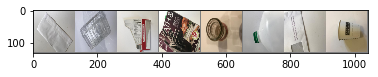

In [28]:
# Show images
n_batches = len(dataiter)
print(u"First 8 labels {}".format([image_classes[labels[j]] for j in range(8)]))

imshow(torchvision.utils.make_grid(images))

## Task 5

[This article](https://cs231n.github.io/convolutional-networks/#overview) is a very good resource to learn more about CNNs and their architecture.

**Add convolutional and pooling layers with dropout to a convolutional neural network (CNN).**

[Conv layer](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d)

[Pooling layer](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d)

[Dropout](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout2d)

In [35]:
class Net(nn.Module):
    # Constructor
    def __init__(self, num_classes=6):
        super(Net, self).__init__()            
        # Our images are RGB, so the number of input channels = 3. 
        # We'll apply 12 filters in the first convolutional layer (the out_channels parameter value)
        # We need to set padding = 1 in order for the convolved image to be the same size as the original image.
        # Let kernel_size = 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # Apply max pooling with a kernel size of 2
        # https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # A second convolutional layer takes 12 input channels, and generates 12 outputs
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # A third convolutional layer takes 12 inputs and generates 24 outputs
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)
        
        # Our image tensors will be pooled twice with a kernel size of 2. (For example 128/2/2 is 32)
        # So our feature tensors are now 32 x 32, and we've generated 24 of them, so the array is 32x32x24
        # We need to flatten these and feed them to a fully-connected layer
        # to map them to the probability for each class.
        # Let the output_features = the number of classes.
        self.fc = nn.Linear(in_features=24576, out_features=6)
        
    def forward(self, x):
        # Use a relu activation function after convolution 1 and pool
        # We need to pass result of first convolution layer into 'pool' function
        x = F.relu(self.pool(self.conv1(x)))
      
        # Use a relu activation function after convolution 2 and pool
        x = F.relu(self.pool(self.conv2(x)))
        
        # Select some features to drop after the 3rd convolution to prevent overfitting
        x = F.relu(self.drop(self.conv3(x)))
        
        # Only drop the features if this is a training pass
        x = F.dropout(x, training=self.training)
        
        # Flatten
        x = x.view(-1, 32 * 32 * 24)
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return class probabilities via a softmax function 
        return F.log_softmax(x, dim=1)

device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Net(num_classes=len(image_classes)).to(device)

print(model)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (drop): Dropout2d(p=0.2)
  (fc): Linear(in_features=24576, out_features=6, bias=True)
)


## Task 6

**Set the model to training mode**

In [36]:
import torch.optim as optim

def train(model, device, train_loader, optimizer, epoch):
    
    ###### TASK 6 start ######
    ###### Set the model to training mode
    ###### https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train
    model.train(True)
    
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        data, target = data.to(device), target.to(device)
        
        ###### TASK 7 start ######
        ###### Reset the optimizer. See TASK 10 for optimizer variable.
        ###### (See https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer.zero_grad)
        optimizer.zero_grad()
        
        ###### TASK 7 end ######
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)
        
        # Keep a running total
        train_loss += loss.item()
        
        ###### TASK 8 start ######
        ###### Backpropagate
        ###### https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
        loss.backward()
        
        ###### TASK 8 end ######
        optimizer.step()
        
        # Print metrics for every 10 batches so we see some progress
        if batch_idx % 10 == 0:
            print('Training set [{}/{} ({:.0f}%)] Loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
    # return average loss for the epoch
    return train_loss / len(train_loader.dataset)
            
            
def test(model, device, test_loader):
    ###### TASK 9 start ######
    ###### Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    
    ###### TASK 9 end ######
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return test_loss
    

###### TASK 10 start ######
###### Use an "Adam" optimizer to adjust weights
###### (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
###### Note: you can use model.parameters() to get parameters for optimization.
optimizer = optim.Adam(model.parameters())
###### TASK 10 end ######

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 5 epochs (in a real scenario, you'd likely use many more)
epochs = 5
for epoch in range(1, epochs + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss = test(model, device, test_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(test_loss)

Epoch: 1
Training set [0/1769 (0%)] Loss: 1.809694
Training set [80/1769 (5%)] Loss: 1.911929
Training set [160/1769 (9%)] Loss: 1.787958
Training set [240/1769 (14%)] Loss: 1.495771
Training set [320/1769 (18%)] Loss: 1.462343
Training set [400/1769 (23%)] Loss: 1.611051
Training set [480/1769 (27%)] Loss: 1.185636
Training set [560/1769 (32%)] Loss: 1.414940
Training set [640/1769 (36%)] Loss: 1.361015
Training set [720/1769 (41%)] Loss: 1.603343
Training set [800/1769 (45%)] Loss: 1.251792
Training set [880/1769 (50%)] Loss: 1.704246
Training set [960/1769 (54%)] Loss: 1.312280
Training set [1040/1769 (59%)] Loss: 1.549317
Training set [1120/1769 (63%)] Loss: 1.034338
Training set [1200/1769 (68%)] Loss: 1.611278
Training set [1280/1769 (72%)] Loss: 1.318633
Training set [1360/1769 (77%)] Loss: 1.475907
Training set [1440/1769 (81%)] Loss: 1.466045
Training set [1520/1769 (86%)] Loss: 1.519650
Training set [1600/1769 (90%)] Loss: 1.207451
Training set [1680/1769 (95%)] Loss: 1.55937

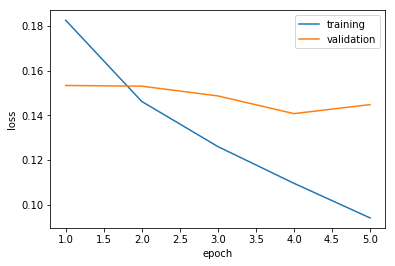

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [23]:
# Save the model weights
model_file = 'shape-classifier.pth'
torch.save(model.state_dict(), model_file)
print("Model saved.")

# Delete the existing model variable
del model

Model saved.


cardboard


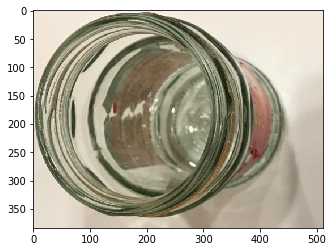

In [24]:
from PIL import Image

# Function to predict the class of an image
def predict_image(classifier, image_array):
   
    # Set the classifer model to evaluation mode
    classifier.eval()
        
    # Apply the same transformations as we did for the training images
    transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Preprocess the imagees
    image_tensor = torch.stack([transformation(image).float() for image in image_array])

    # Turn the input into a Variable
    input_features = Variable(image_tensor)

    # Predict the class of each input image
    predictions = classifier(input_features)
    
    predicted_classes = []
    # Convert the predictions to a numpy array 
    for prediction in predictions.data.numpy():
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(image_classes[class_idx])
    return np.array(predicted_classes)


# Now let's try it with a new image
from random import randint

# Create a new model instance and load the weights
model = Net()
model.load_state_dict(torch.load(model_file))

# load image
img = np.array(Image.open('./garbageCollector/glass/glass21.jpg'));
plt.imshow(img)

# Create an array of (1) images to match the expected input format
image_array = img.reshape(1, img.shape[0], img.shape[1], img.shape[2]).astype('float32')

predicted_classes = predict_image(model, image_array)
print(predicted_classes[0])